In [1]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import t
from scipy.stats import f

# 1.22
**Plastic hardness.** Refer to Problems 1.3 and 1.14. Sixteen batches of the plastic were made, and from each batch one test item was molded. Each test item was randomly assigned to one of the four predetermined time levels, and the hardness was measured after the assigned elapsed time. The results are shown below; X is the elapsed time in hours? and Y is hardness in Brinell units. Assume that first-order regression model (1.1) is appropriate.

a. Obtain the estimated regression function. Plot the estimated regression function and the data. Does a linear regression function appear to give a good fit here?

Equation for an estimated regression function:

$$\hat{Y}_i = b_0 + b_1X_i$$

where the least square estimators $b_0$ and $b_1$ are given by:

$$b_0 = \bar{Y} - b_1\bar{X}$$
$$b_1 = \sum \frac{(Y_i - \bar{Y})(X_i - \bar{X})}{(X_i - \bar{X})^2}$$

In [3]:
dataset_filename = 'CH01PR22.txt'
df_hardness = pd.read_csv(dataset_filename, header=None, delimiter=',')
df_hardness.columns = ['hardness','time']

In [4]:
x = df_hardness['time'].as_matrix()
x = x.reshape(len(x),1)
y = df_hardness['hardness'].as_matrix()
lm = linear_model.LinearRegression()
lm.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [5]:
prediction_y = lm.predict(x)

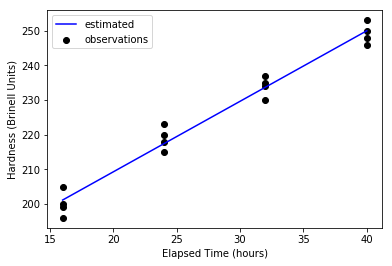

In [6]:
plt.scatter(df_hardness['time'], df_hardness['hardness'], color='black', label='observations')
plt.plot(df_hardness['time'], prediction_y, color='blue', label='estimated')
plt.legend()
plt.xlabel('Elapsed Time (hours)')
plt.ylabel('Hardness (Brinell Units)')
plt.show()

The estimated linear regression function appears to give a good fit. There doesn't seem to be an outliers of the data. The $x$-axis is non-continuous, though I'm not sure that's a problem yet. The range of the fit is between 15 and 40 hours

b. Obtain a point estimate of the mean hardness when $X = 40$ hours.

The point estimate of the mean hardness when $X = 40$ hours is given by

$$E\lbrack Y_{x=40}\rbrack = b_0 + b_1(40)$$

In [7]:
Y = lm.intercept_ + lm.coef_*40
print(Y)

[ 249.975]


c. Obtain a point estimate of the change in mean hardness when $X$ increases by 1 hour

In [8]:
Y_plus_one_hour = lm.intercept_ + lm.coef_*41
change = Y_plus_one_hour - Y
print(change)

[ 2.034375]


An increase in one hour of elapsed time results in approximately 2.03 brinell unit increase in hardness. This is simply the slope of the regression line.

# 1.26
Refer to **Plastic hardness** Problem 1.22

a. Obtain the residuals $e_i$. Do they sum to zero in accord with (1.17)?

In [9]:
residuals = y - prediction_y

In [10]:
np.round(np.sum(residuals),2)

-0.0

The residuals sum to zero as expected.

b. Estimate $\sigma^2$ and $\sigma$. In what units is $\sigma$ expressed?

The estimate of $\sigma^2$ can be gotten from the $MSE$:

$$\hat{\sigma}^2 = MSE = \frac{\sum(Y_i - \hat{Y}_i)^2}{n-2}$$

In [11]:
mse = np.sum(np.power(residuals,2))/(len(residuals)-2)
print(mse)
standard_deviation = np.sqrt(mse)
print(standard_deviation)

10.4589285714
3.23402668069


The standard deviation is in the same units as the response variable (Brinell units)

# Bonus
Identify the estimated standard error for each of the estimated intercept and slope and get a 95% confidence interval for each of $\beta_0$ and $\beta_1$. You can get the confidence intervals directly from R or SAS (or Python) but also write down how they are obtained from the point estimate, standard error and an appropriate t-value, showing what numerical values are involved.



The estimated standard errors for the estimated intercept and slope are given as follows:

$$\sigma\{b_1\} = \sqrt{\frac{\sigma^2}{\sum (X_i - \bar{X})^2}}$$ 
and
$$\sigma\{b_0\} = \sqrt{\sigma^2 \lbrack\frac{1}{2} + \frac{\bar{X}^2}{\sum (X_i - \bar{X})^2}\rbrack}$$ 

both can be estimated by the point estimator $s^2\{b_{10}\}$:
$$s\{b_1\} = \sqrt{\frac{MSE}{\sum (X_i - \bar{X})^2}}$$ 
and
$$s\{b_0\} = \sqrt{MSE \lbrack\frac{1}{n} + \frac{\bar{X}^2}{\sum (X_i - \bar{X})^2}\rbrack}$$ 


In [12]:
estimated_variance_b1 = mse/np.sum(np.power((x - np.mean(x)),2))
estimated_standard_error_b1 = np.sqrt(estimated_variance_b1)
print(estimated_standard_error_b1)

0.0903937937384


In [13]:
estimated_variance_b0 = mse*((1/len(x)) + (np.power(np.mean(x),2)/np.sum(np.power(x - np.mean(x),2))))
estimated_standard_error_b0 = np.sqrt(estimated_variance_b0)
print(estimated_standard_error_b0)

2.65702404688


In [14]:
alpha = 0.05

b1_bounds = t.ppf(1-alpha/2, len(x)-2)*estimated_standard_error_b1
b0_bounds = t.ppf(1-alpha/2, len(x)-2)*estimated_standard_error_b0

In [15]:
print('95% confidence interval for b0 is given by: {int} +/- {int_bound}'.format(int=np.round(lm.coef_[0],3), int_bound=np.round(b1_bounds,3)))
print('95% confidence interval for b1 is given by: {int} +/- {int_bound}'.format(int=np.round(lm.intercept_,3), int_bound=np.round(b0_bounds,3)))

95% confidence interval for b0 is given by: 2.034 +/- 0.194
95% confidence interval for b1 is given by: 168.6 +/- 5.699


# 2.7
Refer to the **Plastic hardness** Problem 1.22

a. Estimate the change in mean hardness when the elapsed time increases by one hour. Use a 99 percent confidence interval. Interpret your interval estimate.

The change in the mean hardness when the elapsed time increases by an hour is given by $b_1 = 2.034$. I will need to calculate the 99 percent confidence interval around this ${b_1}$.

Note:

$$E\lbrack b_1 \rbrack = \beta_1$$
$$\sigma^2\lbrack b_1 \rbrack = \frac{\sigma^2}{\sum (X_i - \bar{X})^2}$$

The latter can be estimated from:

$$s^2\lbrack b_1 \rbrack = \frac{MSE}{\sum (X_i - \bar{X})^2}$$

In [16]:
b = np.sum(np.power((x - np.mean(x)),2))
variance = mse / b
standard_error = np.sqrt(variance)

In [17]:
new_bounds = t.ppf(1 - 0.01/2, len(x)-2)*standard_error
print('{nm} +- {nb}'.format(nm=(lm.coef_)[0], nb=new_bounds))

2.034375 +- 0.2690881080991692


b. The plastic manufacturer has stated that the mean hardness should increase by 2 Brinell units per hour. Conduct a two-sided test to decided whether this standard is being satisfied; use $\alpha = .01$. State the alternatives, decision rule, and conclusion. What is the *P*-value of the test?

The two-sided test is defined as follows:

$$H_0: t^* = 0$$
$$H_a: t^* \ne 0$$
where
$$t^* = \frac{b_1 - 2}{s \{b_1\}}$$

The decision rule is:

If $|t^*| \leq t(1-\alpha/2;n-2)s\{b_1\}$, conclude $H_0$.

If $|t^*| > t(1-\alpha/2;n-2)s\{b_1\}$, conclude $H_a$.

In [18]:
alpha = 0.01 # Significance Level
dof = len(x) # Degrees of freedom

t_stat = (lm.coef_ - 2)/standard_error
print(t_stat[0])

0.380280532306


In [19]:
np.abs(t.ppf(1-(alpha/2), dof-2))

2.97684273411266

Because $t^* = 0.38 < 2.98$, we reject the null hypothesis.

In [20]:
pct = 2*t.sf(np.abs(t_stat), dof-2)[0]
print('{pp}'.format(pp=100.0*pct))

70.94444557701097


# 2.16
Refer to the **Plastic hardness** Problem 1.22

a. Obtain a 98 percent confidence interval for the mean hardness of molded items with an elapsed time of 30 hours. Interpret your confidence interval.

b. Obtain a 98 percent prediction interval for the hardness of a newly molded test item with
an elapsed time of 30 hours.

c. Obtain a 98 percent prediction interval for the mean hardness of 10 newly molded test items,
each with an elapsed time of 30 hours.

d. Is the prediction interval in part (c) narrower than the one in part (b)? Should it be?

e. Determine the boundary values of the 98 percent confidence band for the regression line
when $X_h = 30$. Is your confidence band wider at this point than the confidence interval in
part (a)? Should it be?

### a

The interval can be given by $\hat{Y}_h \pm t(1-\alpha/2;n-2)s\{\hat{Y}_h\}$ 

where

$s^2\{\hat{Y_h}\} = MSE [\frac{1}{n} + \frac{(X_h - \bar{X})^2}{\sum(X_i - \bar{X})^2}]$

In [21]:
part_a_var = mse*((1/len(x)) + (np.power(30-np.mean(x),2)/np.sum(np.power(x-np.mean(x),2))))
y_hat_h = lm.intercept_ + lm.coef_*30
alpha = 0.02
dof = len(x)
t_value = t.ppf(1-(alpha/2), dof-2)

In [22]:
print(t_value*np.sqrt(part_a_var))
print(y_hat_h[0])
print(y_hat_h[0]-t_value*np.sqrt(part_a_var))
print(y_hat_h[0]+t_value*np.sqrt(part_a_var))

2.17432196008
229.63125
227.45692804
231.80557196


The 98% interval is given by $229.63 \pm 2.17$

### b

The interval can be given by $\hat{Y}_{h(new)} \pm t(1-\alpha/2;n-2)s\{pred\}$ 

where

$s^2\{pred\} = MSE + s^2\{\hat{Y}_h\}$

In [23]:
part_b_var = mse + part_a_var

In [24]:
print(t_value*np.sqrt(part_b_var))
print(y_hat_h[0] - t_value*np.sqrt(part_b_var))
print(y_hat_h[0] + t_value*np.sqrt(part_b_var))

8.76176083425
220.869489166
238.393010834


### c

The interval can be given by $\hat{Y}_{h(new)} \pm t(1-\alpha/2;n-2)s\{predmean\}$ 

where

$s^2\{predmean\} = \frac{MSE}{m} + s^2\{\hat{Y}_{h}\}$

In [25]:
part_c_var = (mse/10) + part_a_var

In [26]:
print(t_value*np.sqrt(part_c_var))
print(y_hat_h[0] - t_value*np.sqrt(part_c_var))
print(y_hat_h[0] + t_value*np.sqrt(part_c_var))

3.4542370618
226.177012938
233.085487062


### d

The interval of c is more narrow that d (3.45 compared to 8.76). The new value is based on 10 additional observations. This lowers the "impact" of the MSE on the variance.

### e

The boundary values can be given by the Working-Hotelling procedure: 

$\hat{Y}_h \pm Ws{\{\hat{Y}_h\}}$

where

$W^2 = 2F(1-\alpha;2;n-2)$

In [27]:
dubya = np.sqrt(2*f.ppf(1-alpha,2,len(x)-2))
print(y_hat_h[0])
print(np.sqrt(part_a_var)*dubya)
print(y_hat_h[0]+np.sqrt(part_a_var)*dubya)
print(y_hat_h[0]-np.sqrt(part_a_var)*dubya)

229.63125
2.68219278908
232.313442789
226.949057211


The confidence band at $X_h = 30$ is wider than in part a. 

### f
Get a plot of the confidence intervals for $E(Y)$ and prediction intervals, plotted
as a function of $X$.

In [70]:
# Calculate var{y_h} for each level h
alpha = 0.02
known_levels = np.unique(x)
confidence_intervals_y = np.empty(16,)

for i in range(len(x)):
    h = x[i]
    y_hat_var = mse*(np.power(h - np.mean(x),2) / np.sum(np.power((x-np.mean(x)),2)))
    dubya = np.sqrt(2*f.ppf(1-alpha,2,len(x)-2))
    confidence_interval_length = dubya*np.sqrt(y_hat_var)
    confidence_intervals_y[i] = confidence_interval_length
    
prediction_intervals_y = np.empty(16,)

# Calculate var{pred}
for i in range(len(x)):
    h = x[i]
    y_hat_var = mse*(np.power(h - np.mean(x),2) / np.sum(np.power((x-np.mean(x)),2)))
    y_pred = mse + y_hat_var
    t_score = t.ppf(1-(alpha/2),len(x)-2)
    prediction_interval_length = t_score*np.sqrt(y_hat_var)
    prediction_intervals_y[i] = prediction_interval_length
    
# Create Bounds
confidence_upper_bounds = np.empty(16,)
confidence_lower_bounds = np.empty(16,)
prediction_upper_bounds = np.empty(16,)
prediction_lower_bounds = np.empty(16,)

for i in range(len(x)):
    h = x[i]
    mean = lm.intercept_ + lm.coef_*h
    confidence_upper_bounds[i] = mean + confidence_intervals_y[i]
    confidence_lower_bounds[i] = mean - confidence_intervals_y[i]
    prediction_upper_bounds[i] = mean + prediction_intervals_y[i]
    prediction_lower_bounds[i] = mean - prediction_intervals_y[i]

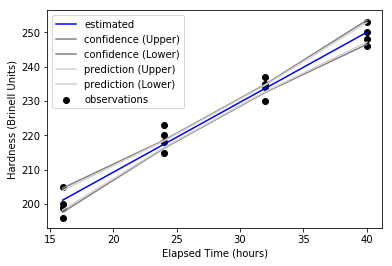

In [74]:
plt.scatter(df_hardness['time'], df_hardness['hardness'], color='black', label='observations')
plt.plot(df_hardness['time'], prediction_y, color='blue', label='estimated')
plt.plot(df_hardness['time'], confidence_upper_bounds, color='gray', label='confidence (Upper)')
plt.plot(df_hardness['time'], confidence_lower_bounds, color='gray', label='confidence (Lower)')
plt.plot(df_hardness['time'], prediction_upper_bounds, color='lightgray', label='prediction (Upper)')
plt.plot(df_hardness['time'], prediction_lower_bounds, color='lightgray', label='prediction (Lower)')
plt.legend()
plt.xlabel('Elapsed Time (hours)')
plt.ylabel('Hardness (Brinell Units)')
plt.show()